# **Creating a Cryptocurrency Trading Algorithm in Python**


First, we'll need a way to retrieve the cryptocurrency market data we need. Yahoo Finance is a popular website and service that provides up-to-date financial news and market quotes. Luckily, there is a Python library called `yfinance` that allows you to easily access and save this data. Let's go ahead and install it.


In [ ]:
!pip install yfinance

We'll also use a few other Python libraries to do some basic analysis of the cryptocurrency market data. Let's go ahead and install those too. 

In [5]:
# pip install pandas

In [ ]:
# pip install numpy

In [ ]:
# pip install matplotlib

Now let's import the libraries we're going to use.


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

---


## **Get Familiar with Bitcoin-USD Exchange Rate Data**


The yfinance library has a built-in method for retrieving historical market data. Let's use this to get the exchange rate of Bitcoin to US Dollars over the year of 2020. We use the `download()` method, passing in the ticker we're interested in ("BTC-USD"), the start and end dates, and the time interval between datapoints. Let's use a 1 day interval.


In [7]:
# Retrieve two weeks of Bitcoin to USD exchange rates with a 1 hour interval and save the dataframe to a variable.
BTC_USD = yf.download("BTC-USD", start='2020-01-01', end='2020-12-31', interval='1d')

[*********************100%***********************]  1 of 1 completed


Now we have a dataframe assigned to the variable `BTC_USD` storing the historical BTC-USD exchange over 2020. To get a sense for the data we have, we call the `head()` method from the pandas library on the dataframe. 




In [8]:
BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


### **Create a Price Chart**


A great way to get a feel for the data you're working with is to create a basic plot to visualize it. Price charts are an essential tool for understanding and analyzing a given stock or currency. They are a time series showing an asset's price over time. The most basic type of price chart is the _line chart_, so let's go ahead and make one of those. 

In a line chart, we connect the adjusted closing price of the asset at the end of each day with a continuous line. We can use the matploitlib library to easily create our price chart. Let's do it!


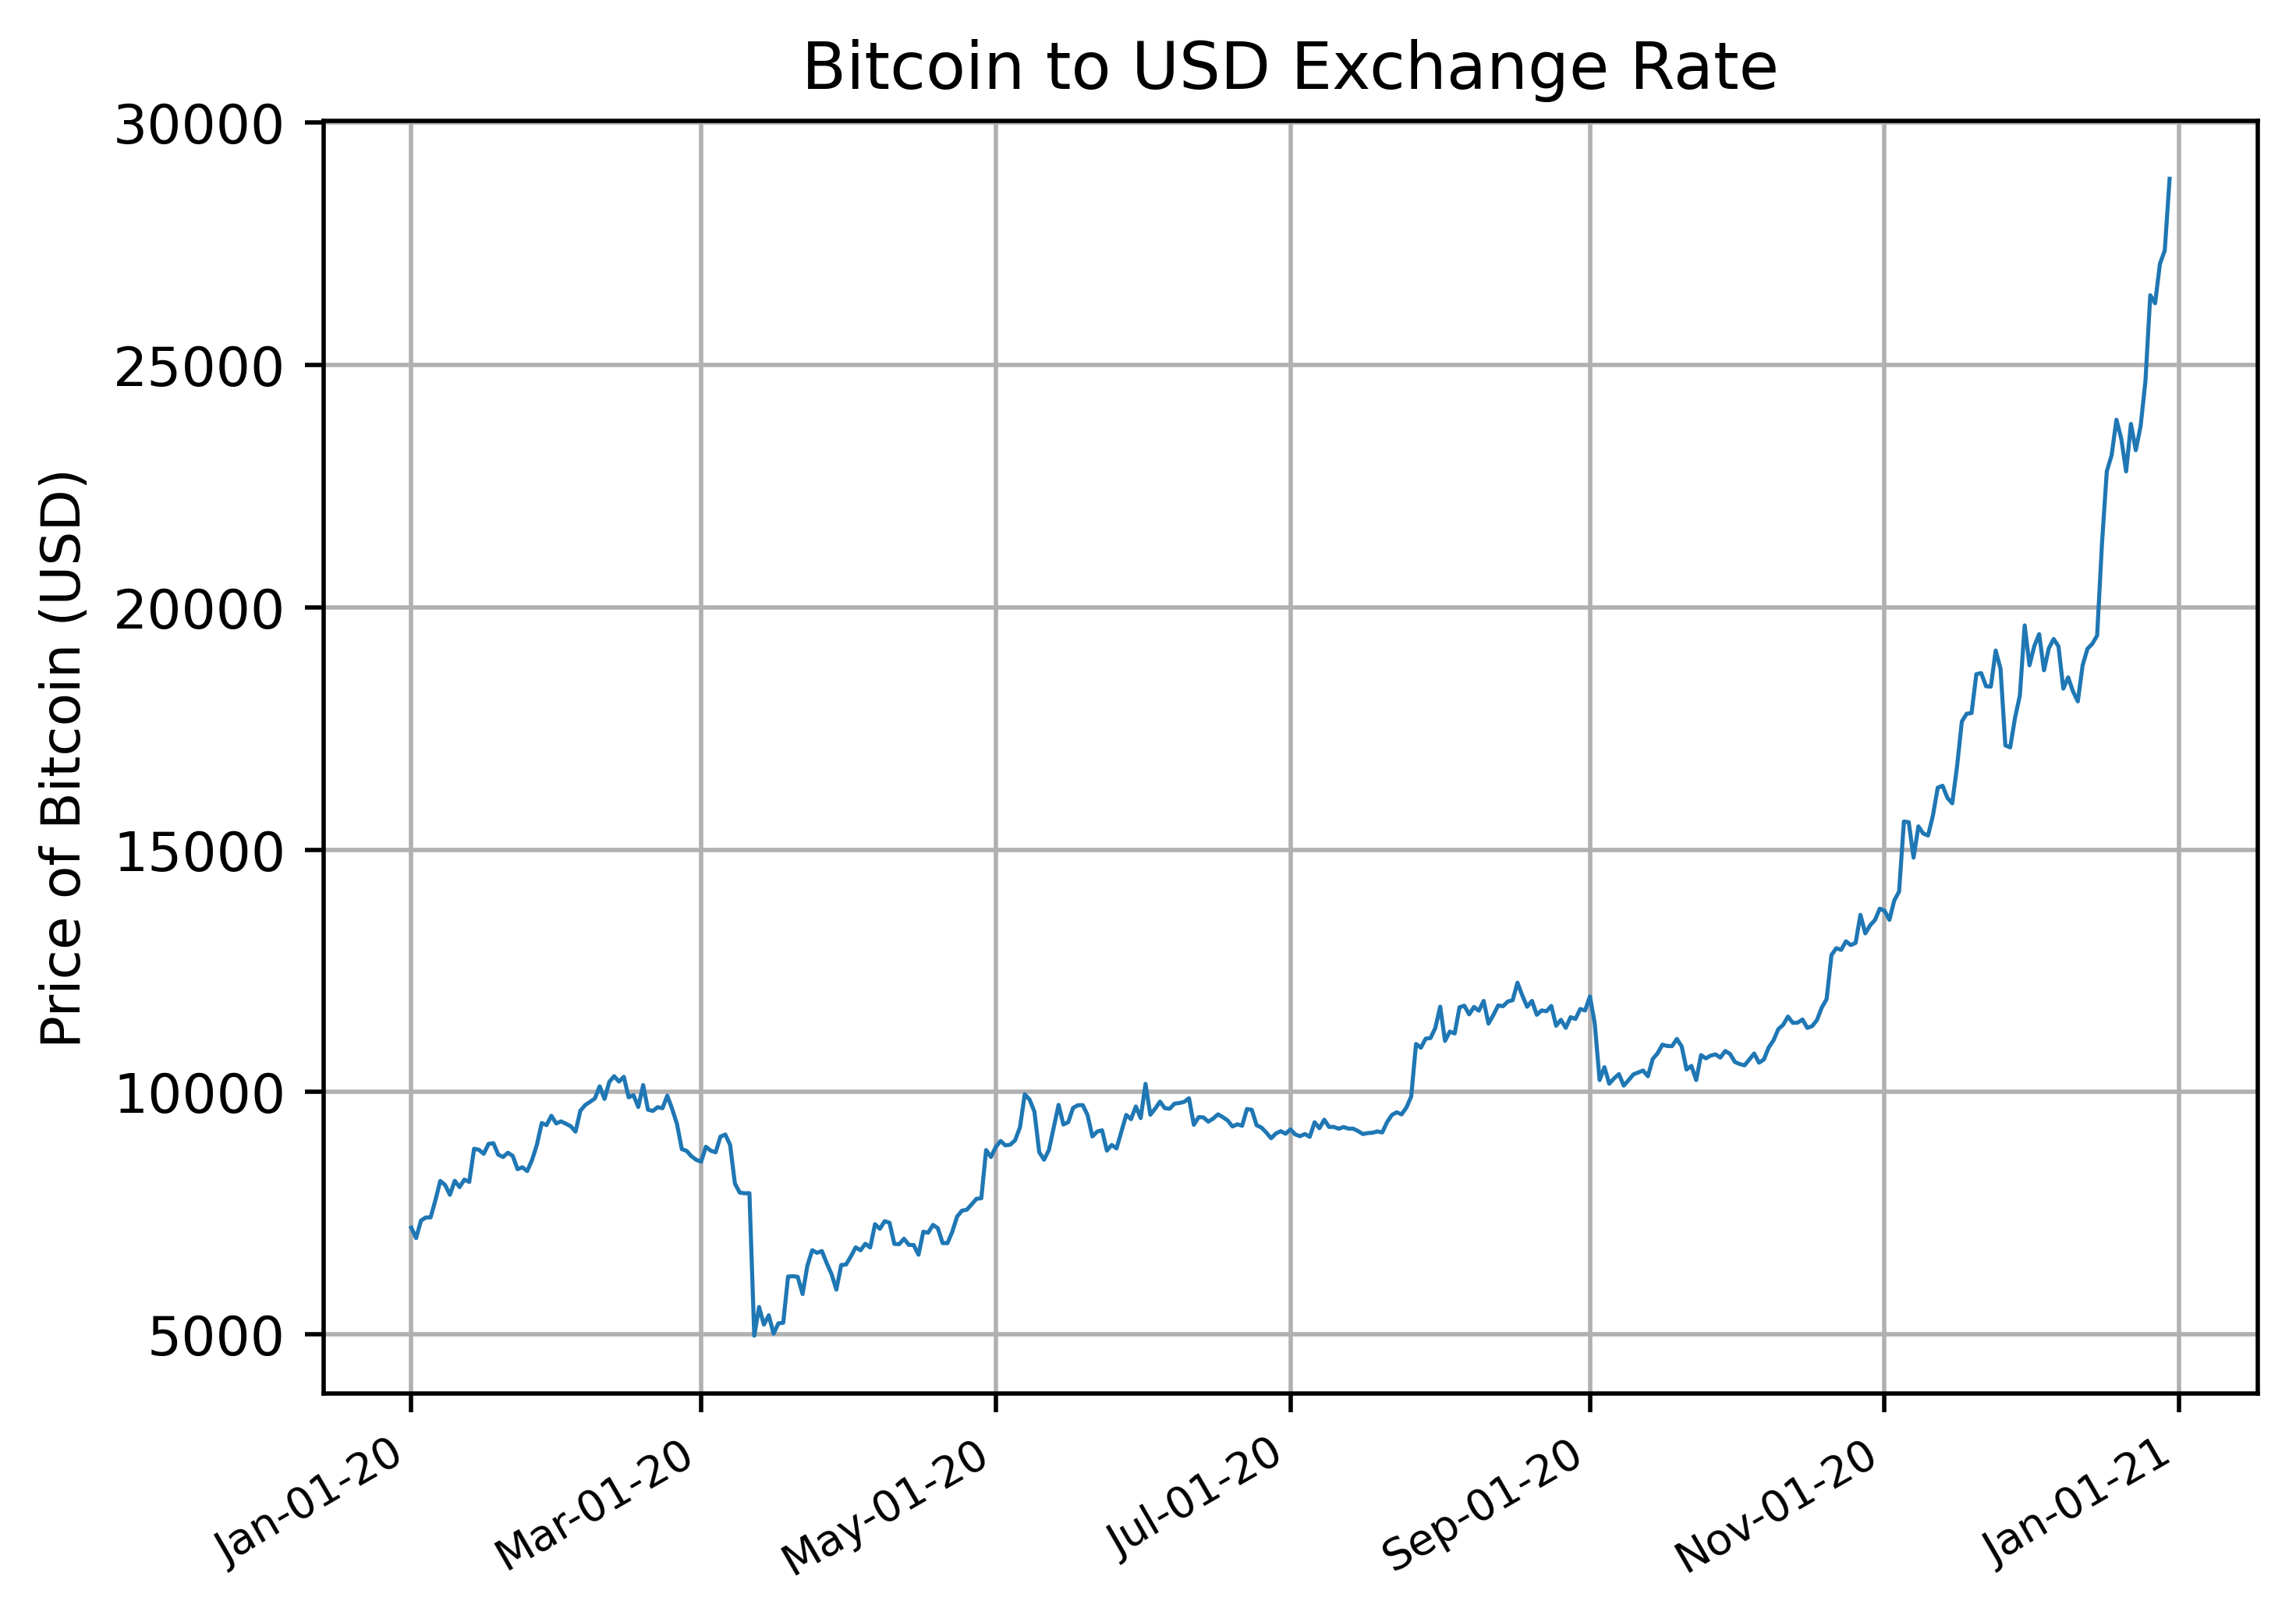

In [9]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75)

# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid

# Displaying the price chart
plt.show()

###  Compute Simple Moving Averages


In [10]:
# Compute a 9-day Simple Moving Average with pandas
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()

In [11]:
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()

Great! Now we should have two new columns in the `BTC_USD` dataframe containing two Simple Moving Averages of different length intervals. Let's go ahead and double check that this is the case. Similar to the `head()` method, the `tail()` method gives a preview of a dataframe, only this time, it shows the last 5 entries instread of the first 5.


In [12]:
# Display the last 5 entries of the dataframe
BTC_USD.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2020-12-26,24677.015625,26718.070312,24522.689453,26437.037109,26437.037109,48332647295,23905.591363,20518.139062
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605,24253.850694,20823.602148
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893,24611.070312,21135.848633
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774,25042.752821,21442.013737
2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704,25713.627387,21749.184310


### Plot the Simple Moving Averages


Let's go ahead and plot them to get a visual understanding of the trends. We can reuse much of our code from the linechart we created earlier and simply plot the Moving Averages over top.


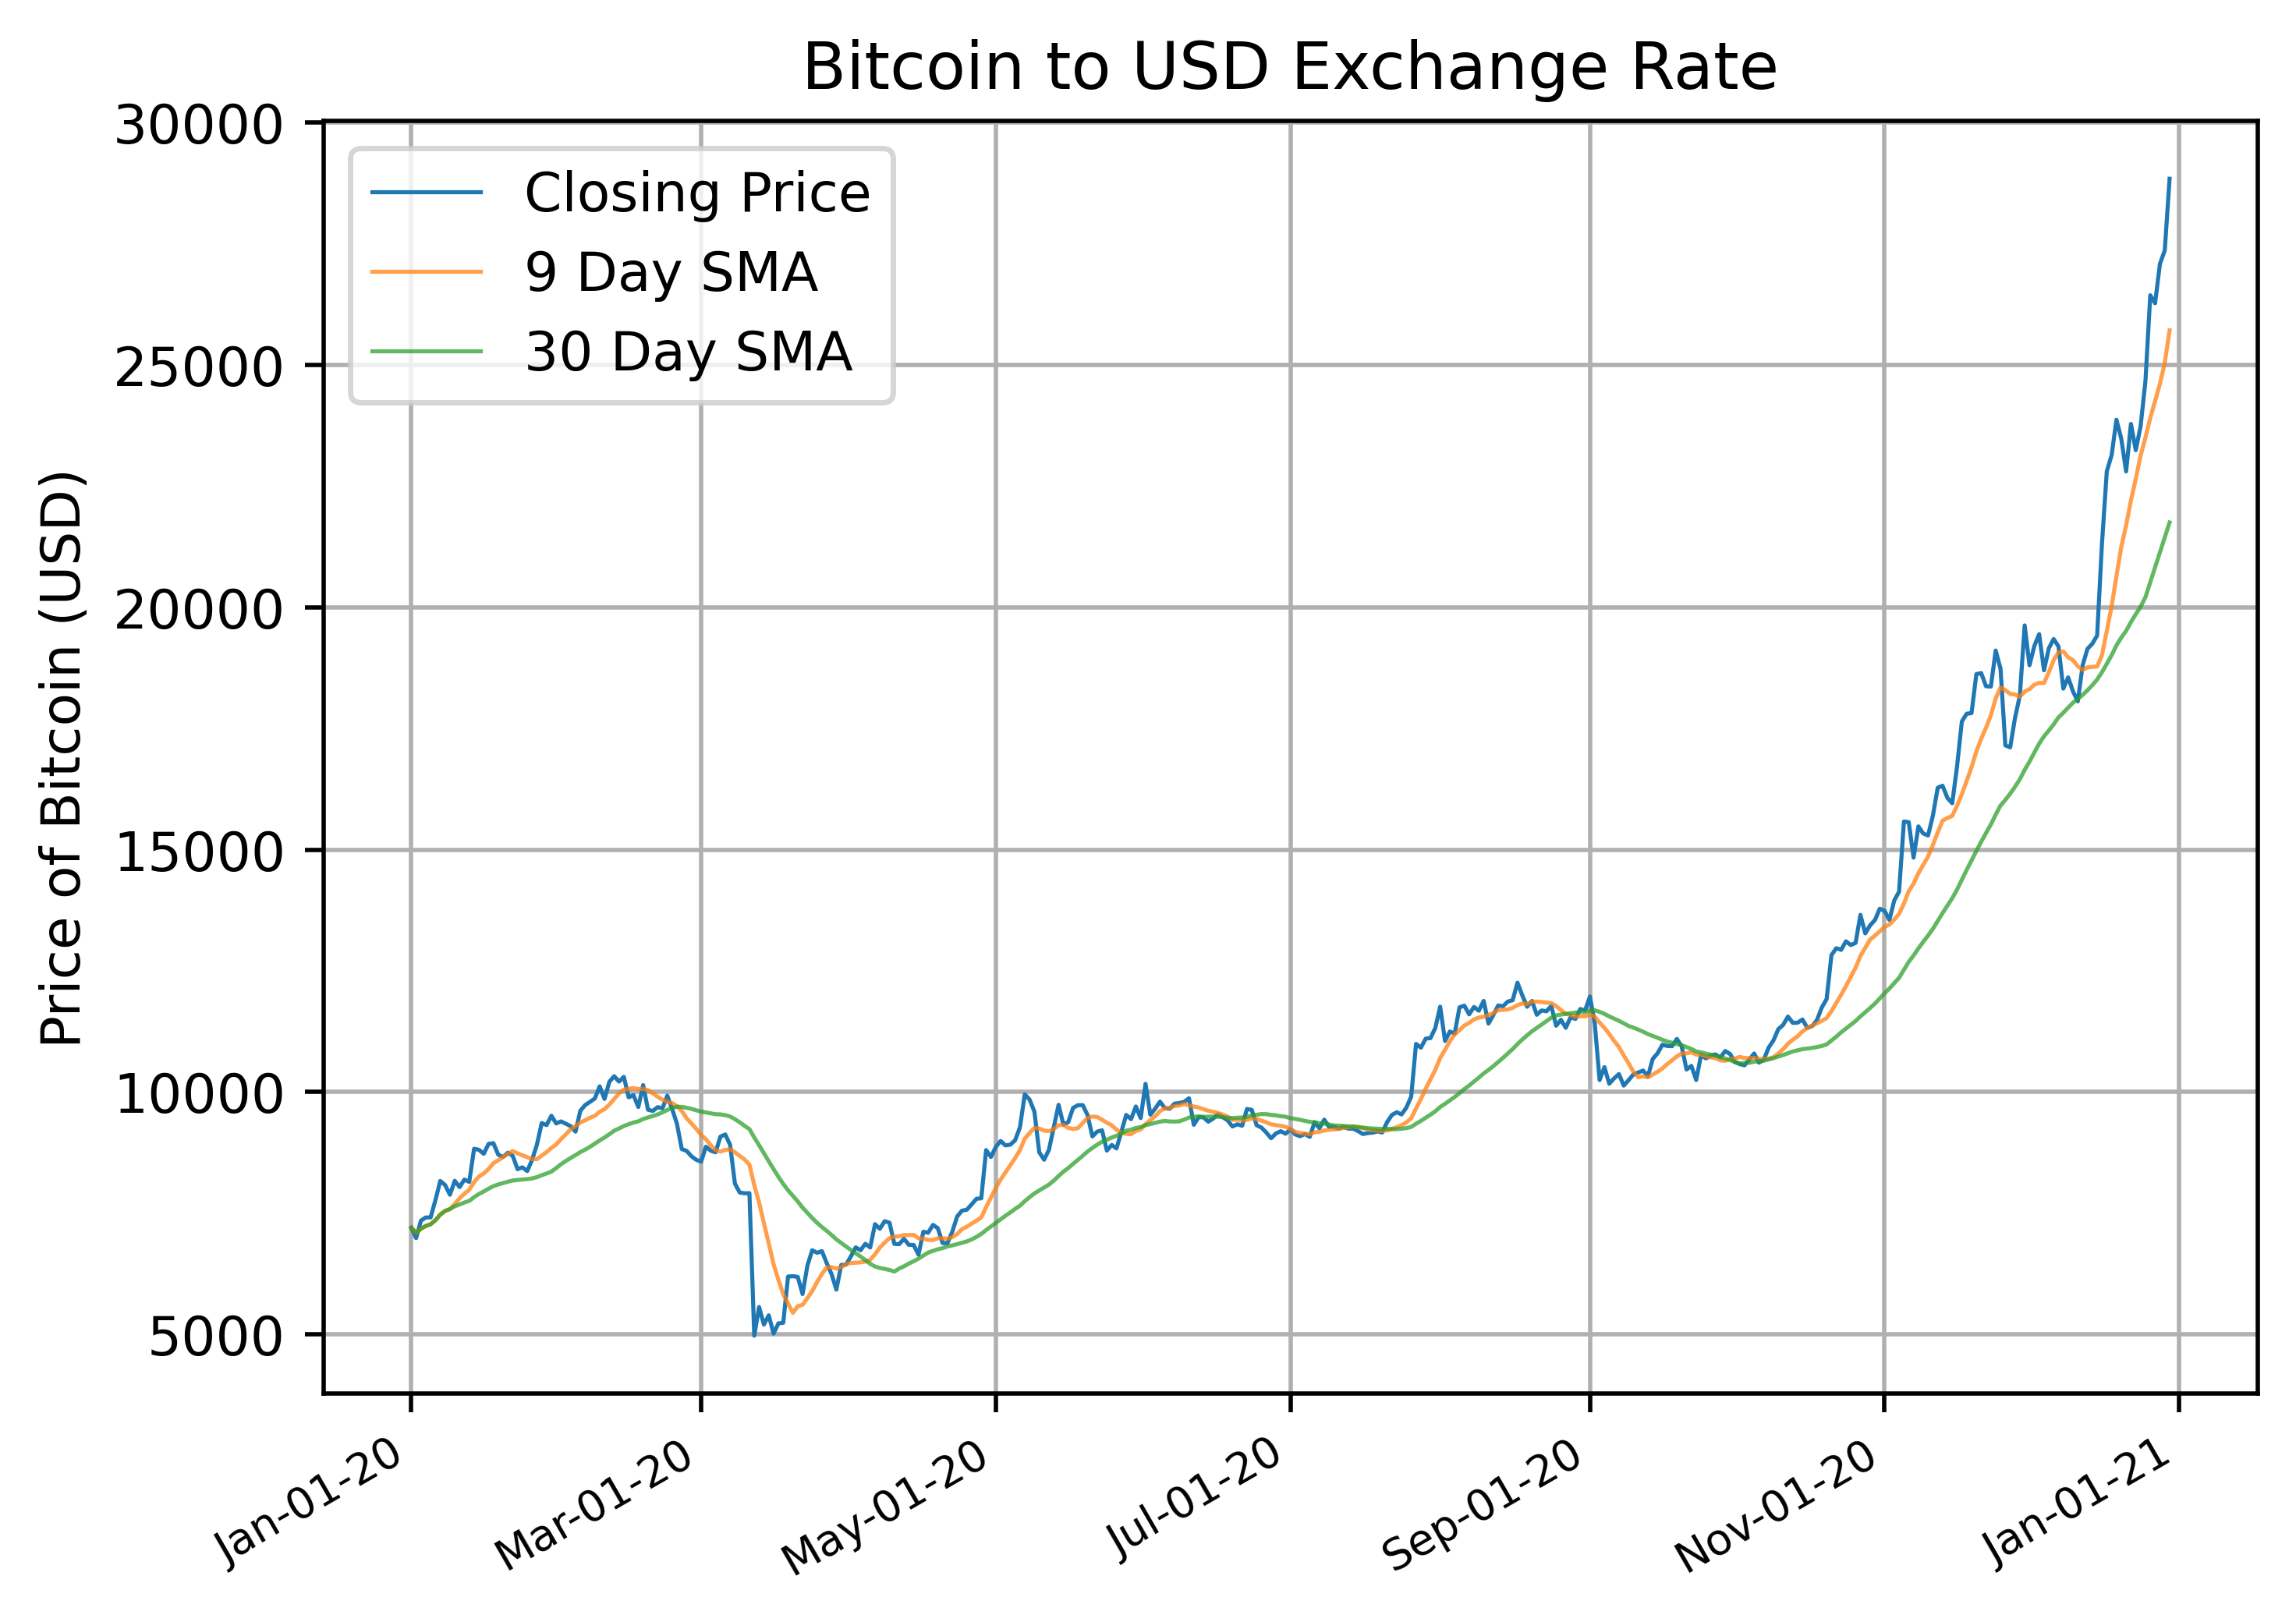

In [13]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

"""
We have already seen the code above earlier - we are simply reusing it.
Below we plot the 9 and 30 day Simple Moving Averages and give them the appropriate label
"""
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

From the plot we can see that the Simple Moving Averages had a smoothing effect on the line chart - much of the short term Bitcoin price fluctuations were smoothed out and the moving averages appear to reveal some longer term trends. As expected, the 30 day interval had a more significant smoothing effect than the 9 day interval. 


---


One of the simplest trading strategies making use of Simple Moving Averages is the [***Moving Average Crossover***](https://en.wikipedia.org/wiki/Moving_average_crossover?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsanalyzecryptomarketswiththecoinbaseapi457-2023-01-01). The basic idea behind this strategy is to use two Simple Moving Averages - one with a relatively short sampling interval and the other with a longer interval. When the shorter moving average crosses over the longer interval moving average, it can signal a reversal in trend. For example, if the shorter term moving average is below the longer moving average but then crosses over to the top of it, this may signal the beginning of an upwards (bullish) trend. Using the _Moving Average Crossover_ strategy, this would be a _buy_ signal. Similarily, when the shorter moving average is above the longer interval one and it crosses under, this could signal a downward (bearish) trend, which would be a _sell_ signal in this strategy.`

<br>

The simplicity of this approach makes it an excellent first strategy to implement. Let's jump right into it.

In [14]:
# Create a pandas dataframe that is the same size as the BTC_USD dataframe and covers the same dates
trade_signals = pd.DataFrame(index=BTC_USD.index)

# Define the intervals for the Fast and Slow Simple Moving Averages (in days)
short_interval = 10
long_interval = 40

# Compute the Simple Moving Averages and add it to the dateframe as new columns
trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()

Now we have a dataframe containing the dates we're interested in and two Simple Moving Averages, one with a short interval and the other with a longer sampling interval. This gives us the information we need to figure out where the two Moving Averages cross, which is the core of this trading strategy. Let's create a new column called `Signal` that is populated everywhere with zeros, except for a one wherever the two Moving Averages cross.


In [15]:
# Create a new column populated with zeros
trade_signals['Signal'] = 0.0

# Wherever the Shorter term SMA is above the Longer term SMA, set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)   

The two lines of code executed above give us a column called `Signal`. At every date where the short-term moving average is above the long-term moving average for at least a period of time equal to `short_interval`, the value is 1.0 and 0.0 elsewhere. This is great information but we're not quite yet done. We're interested in determining at what point we should actually buy and sell our Bitcoin.

According to our _Moving Average Crossover_ strategy, we want to buy when the short-term SMA crosses the long-term SMA from below, and sell when it crosses over from above. We can easily use the `Signal` column in the `trade_signals` dataframe to determine where exactly these events occur. If the `Signal` column has value 0.0 on a given date then switches to 1.0, this means the short-term SMA crossed the long-term SMA from _below_ - this is our time to **buy** Bitcoin according to our strategy. On the other hand, if the value goes from 1.0 to 0.0, that tells us the short-term SMA was _above_ the long-term SMA and then crossed over - this is our time to **sell**.

Let's create a new column in the dataframe called `Positions`, where for each date in the dataframe it will tell the algorithm which action to take. A value of 1.0 will represent a _buy_ order, a -1.0 will be a _sell_ order, and a value of 0.0 will tell the algorithm to take no action. To compute these values from the `Signal` column, the `diff()` method from the pandas library will prove extraordinarily useful. The [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsanalyzecryptomarketswiththecoinbaseapi457-2023-01-01) for this method tells us that it calculates the difference of a Dataframe element compared with another element in the Dataframe, with the default being the element in the previous row.

Using this method, we can easily compute the action the algorithm should take at each step. Suppose the short-term SMA is below the long-term SMA. Then for that period, the `Signal` column will have the value 0. Then suppose we have a crossing, such that the short-term SMA now moves above the long-term one. Then the `Signal` column will now have value 1.0 and so the `diff()` method will compute the difference between the `Signal` value that day and the one before, i.e., $1 - 0 = 1$, thus giving us a `Positions` value of 1 for that day (i.e., a **buy** order). The opposite scenario occurs when the short-term SMA crosses back underneath the long-term SMA. the `diff()` method assigns a value of $0 - 1 = -1$ to the `Position` column on the day of the crossing (i.e., a **sell** order). On the days where there is no crossing, each consecutive day has the same value in the `Signal` column, so the `diff()` method assigns a value of 0 to the `Position` column.

<br>

Luckily all that thinking and computation is condensed into one simple line of code.



In [16]:
trade_signals['Position'] = trade_signals['Signal'].diff()

## **Testing the Strategy**


Let's make a plot to visualize the algorithm's trades before going into more detail and analyzing its performance quantiatively. We will plot the closing price and the two Simple Moving Averages we computed as part of the trading strategy. Furthermore, where the trading algorithm decides to make a **buy** order, we will plot an upwards facing green arrow. Where the algorithm places a **sell** order, we will plot a downwards facing red arrow.


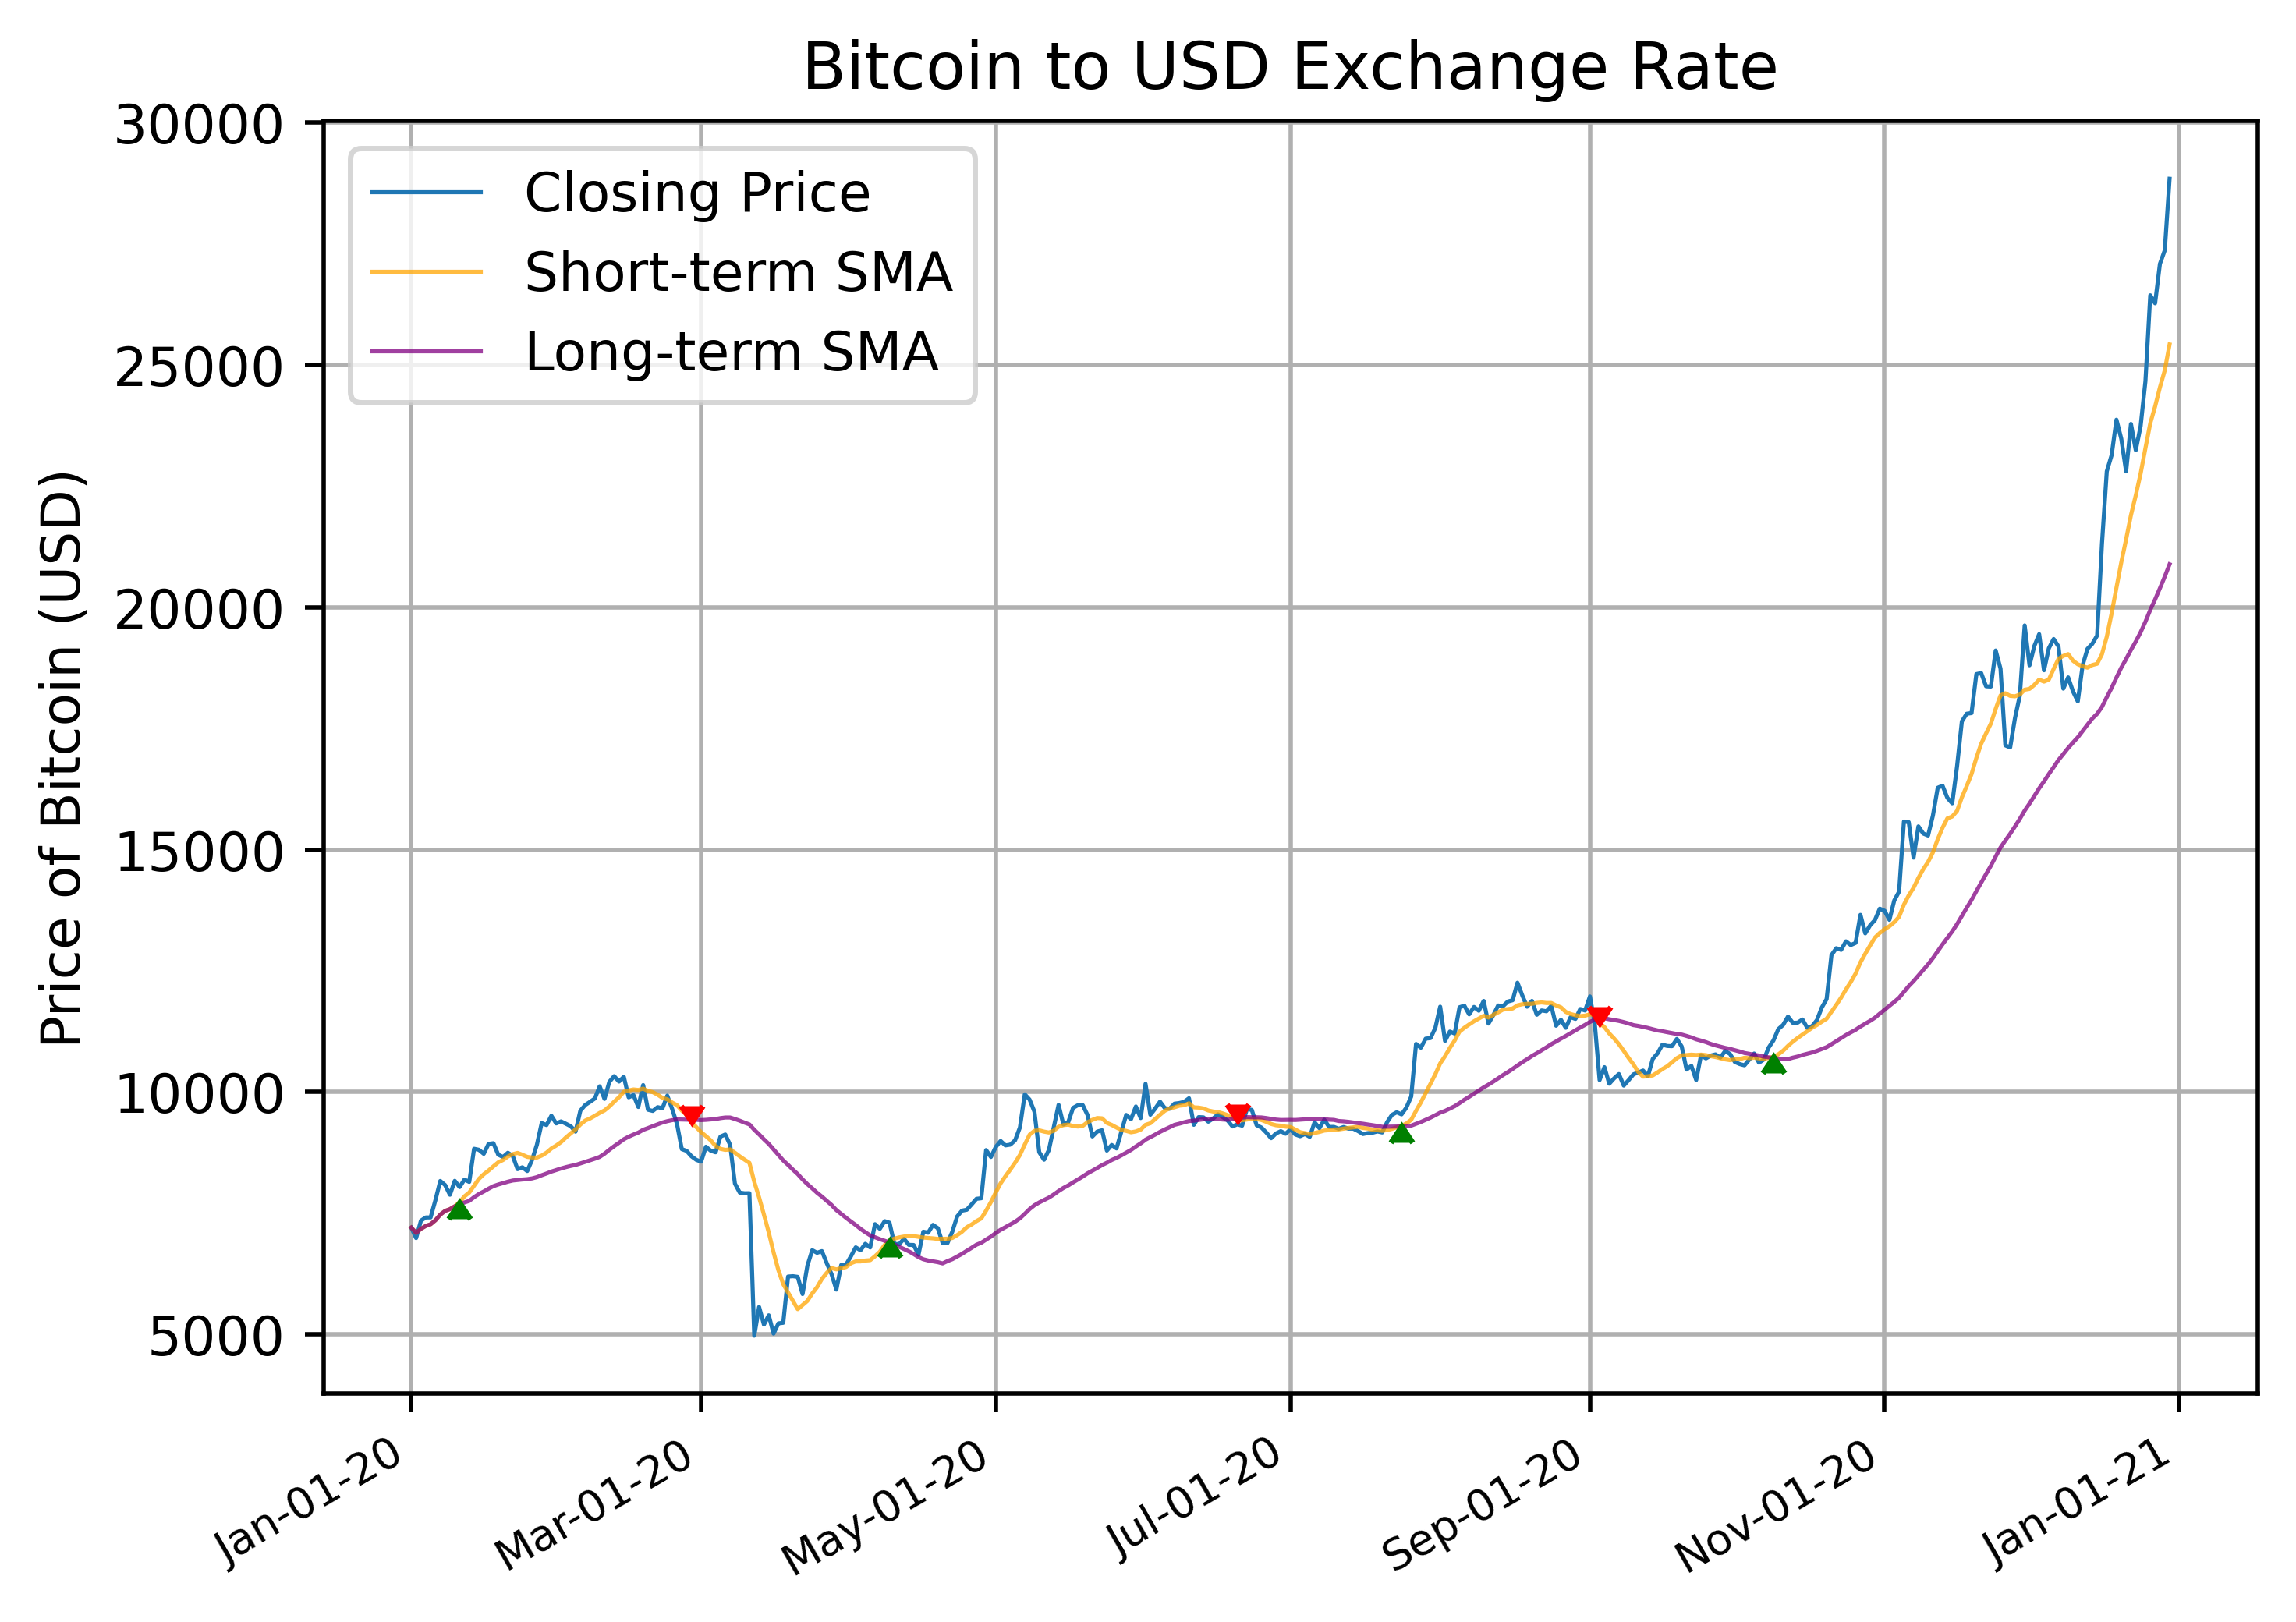

In [17]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plot the longer-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

Nice! With a quick glance it looks like our algorithm is working as it should. It appears to have bought Bitcoin at relative lows and sold later at a higher price. Feel free to go back and change the values of the `short_interval` and `long_interval` variables to see how that changes things. For now, we'll continue on with the parameters we have and do some quantitative analysis to see how our algorithm performed.


### **Backtest the Algorithm**


Once we have a trading algorithm implemented, we will certainly want to test it to see if it can actually produce a profit and compare its performace with other strategies. Often, the first way to do this is to perform a [**backtest**](https://www.investopedia.com/terms/b/backtesting.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsanalyzecryptomarketswiththecoinbaseapi457-2023-01-01). The core idea behind a backtest is to simulate running the trading algorithm on historical data and compute several metrics, such as the return. While this method certainly _does not_ guarantee that the algorithmn will be consistently profitable, it's a quick way to test the viability of a strategy and reject clearly unfeasable strategies.

Let's do a simple backtest over the 2020 BTC-USD data on the trading algorithm we implemented. There are many libraries that can perform sophisticated backtests on a variety of algorithms, however, to develop an understanding of the underlying principle, let's implement our own simple backtest. Let's suppose we start with an account with $10,000 USD.


In [18]:
# Define how much money you will start with (in USD)
initial_balance = 10000.0 # ten thousand USD

# Create dataframe containing all the dates considered
backtest = pd.DataFrame(index=trade_signals.index)

# Add column containing the daily percent returns of Bitcoin
backtest['BTC_Return'] = BTC_USD['Close'] / BTC_USD['Close'].shift(1) # Current closing price / yesterday's closing price


Now to compute the daily returns of the trading algorithm, let's assume that at any given point, our portfolio is either all in on Bitcoin or is entirely holding USD. This means that whenever the algorithm is currently holding Bitcoin, it's daily returns are the same as the daily returns of Bitcoin. On the other hand, when the algorithm is holding USD, its returns are entirely detached from Bitcoin price movements. Thus when holding USD, the value of the portfolio remains constant during that period. We will also make the simplifying assumption that we are able to perform zero comission trades. This reasoning is condensed into the following two lines of code.


In [19]:

# Add column containing the daily percent returns of the Moving Average Crossover strategy
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

# Add column containing the daily value of the portfolio using the Crossover strategy
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod() # cumulative product

Let's make a plot comparing the performance of trading algorithm we implemented and a simple "Buy and Hold" strategy which will serve as a baseline. Plot the value of the portfolio using either strategy over the course of 2020.


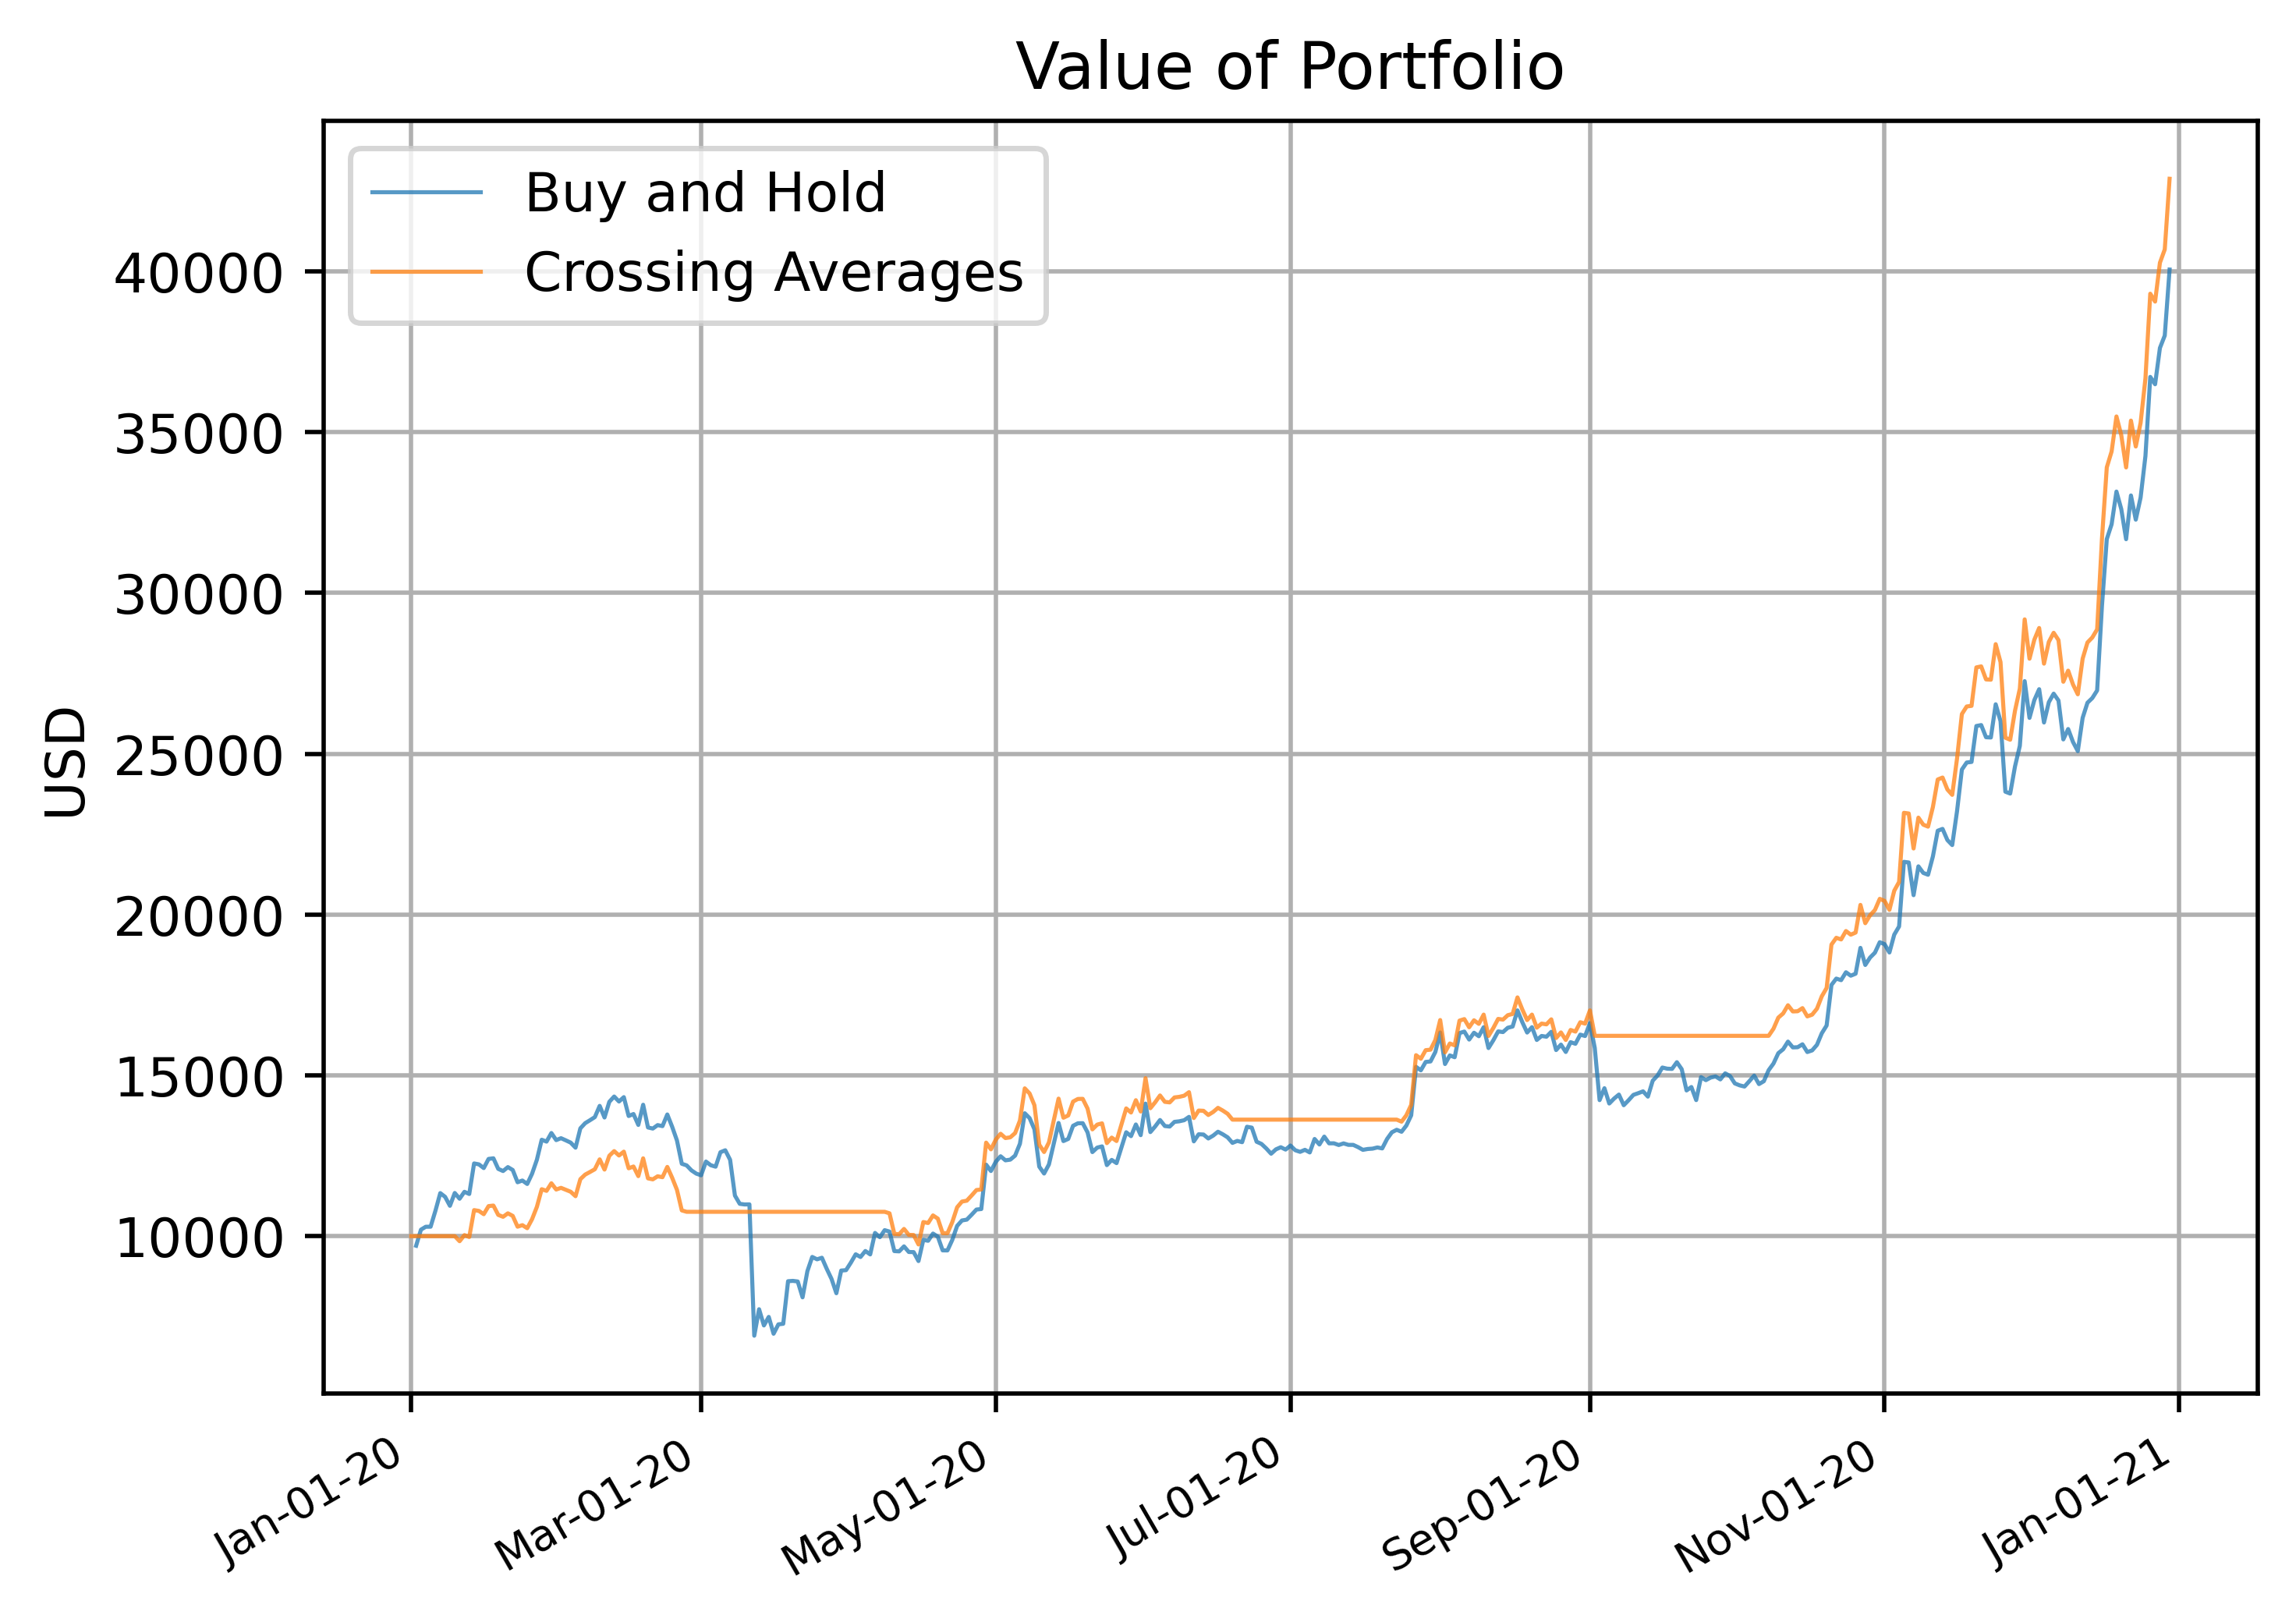

In [20]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

From the plot we can see that both strategies produced in an enormous return on investment, more than quadrupling the value of our portfolio. Obviously this was due to the meteoric rise of Bitcoin prices near the end of the year and we should certainly ***not*** consistently expect similar returns in the future.

However, it's reassuring to see that the trading algorithm at least appears to be feasible, even slightly out performing the baseline Buy and Hold strategy. In the plot we can clearly see the periods in which the algorithm was all in on Bitcoin and the periods where it was holding USD. In the former periods, the growth of the portfolio mirrored the growth of Bitcoin. In the latter period, mostly where Bitcoin was trending downwards, the portfolio remained constant in value and was not brought down by falling Bitcoin prices.
